In [1]:
%matplotlib inline

In [2]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import seaborn as sns; sns.set(color_codes=True)

In [3]:
gaon = pd.read_csv("./total.csv",delimiter="|")
melon = pd.read_csv("./melon.csv",delimiter="|")

In [4]:
row = gaon.join(melon.set_index(["title","artist","year","week"]),on=["title","artist","year","week"])
row = row[np.isnan(row["melon_rank"]) == False].sort_values(by=["year","week","melon_rank"])
row = gaon 
y_label = "digital_rank"
row = row[np.isnan(row[y_label]) == False].sort_values(by=["year","week",y_label])

In [5]:
#row = pd.read_csv("./total.csv",delimiter="|")
#original_row = row.copy()
#row = row.drop(["karaoke_rank","social_rank","social_count"],axis=1).dropna()

In [37]:
#drop_column = ["download_count","streaming_count","bgm_rank","karaoke_rank","social_rank","social_count"]
drop_column = []
row.drop(drop_column,axis=1).dropna().count()

year               364
week               364
title              364
artist             364
digital_rank       364
download_rank      364
download_count     364
streaming_rank     364
streaming_count    364
bgm_rank           364
mobile_rank        364
karaoke_rank       364
social_rank        364
social_count       364
dtype: int64

In [38]:
data_x = row.copy(deep=True).drop(["year", "week", "title", "artist"] + drop_column, axis=1).dropna()
# data_x = data_x.fillna(value=0)

In [39]:
data_x.head()

,digital_rank,download_rank,download_count,streaming_rank,streaming_count,bgm_rank,mobile_rank,karaoke_rank,social_rank,social_count
43611,10.0,17.0,73408.0,7.0,2504329.0,2.0,1.0,21.0,23.0,16643.0
43667,66.0,85.0,23343.0,41.0,909655.0,55.0,11.0,4.0,8.0,31001.0
43233,11.0,19.0,60344.0,7.0,2331789.0,1.0,2.0,19.0,22.0,20072.0
43283,61.0,77.0,20300.0,44.0,809158.0,62.0,14.0,9.0,15.0,26683.0
42856,19.0,27.0,49944.0,11.0,1977303.0,6.0,2.0,17.0,24.0,14602.0


In [40]:
#data_y = data_x.copy()["melon_rank"]
#data_x = data_x.drop(["melon_rank"], axis=1)
data_y = data_x.copy()[y_label]
data_x = data_x.drop([y_label], axis=1)

In [41]:
data_x.count()

download_rank      364
download_count     364
streaming_rank     364
streaming_count    364
bgm_rank           364
mobile_rank        364
karaoke_rank       364
social_rank        364
social_count       364
dtype: int64

In [42]:
data_y.count()

364

In [43]:
#dx = data_x.copy()
#dx["download_rank"] = dx["download_rank"].fillna(value=101)
#dx["download_count"] = dx["download_count"].fillna(value=0)
#dx["streaming_rank"] = dx["streaming_rank"].fillna(value=101)
#dx["streaming_count"] = dx["streaming_count"].fillna(value=0)
#dx["bgm_rank"] = dx["bgm_rank"].fillna(value=101)
#dx["mobile_rank"] = dx["mobile_rank"].fillna(value=101)
#dx["karaoke_rank"] = dx["karaoke_rank"].fillna(value=101)
#dx["social_rank"] = dx["social_rank"].fillna(value=101)
#dx["social_count"] = dx["social_count"].fillna(value=0)

In [44]:
#dy = data_y.fillna(value=101)
#dys = dy.sample(frac=1).sample(n=10000)
half = data_y.count()/2
result = sm.OLS(data_y[:half], data_x[:half], missing="drop").fit()

#result = sm.OLS(dys, dx.iloc[dys.index], missing="drop").fit()
print(result.summary())
print("train error: ", result.mse_total)

y_predict = result.predict(data_x[half:])
rrr = metrics.mean_squared_error(data_y[half:], y_predict)
print("test error: ", rrr)
#print(result.predict())

                            OLS Regression Results                            
Dep. Variable:           digital_rank   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1454.
Date:                Mon, 28 Nov 2016   Prob (F-statistic):          5.39e-158
Time:                        23:42:54   Log-Likelihood:                -480.33
No. Observations:                 182   AIC:                             978.7
Df Residuals:                     173   BIC:                             1008.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
download_rank       0.5205      0.025     

In [45]:
#sns.lmplot(y="digital_rank",x="download_count",data=row[["digital_rank","download_count"]])

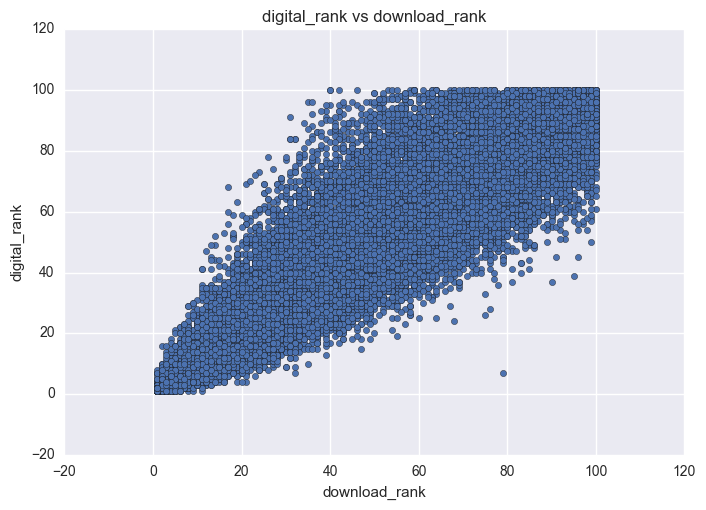

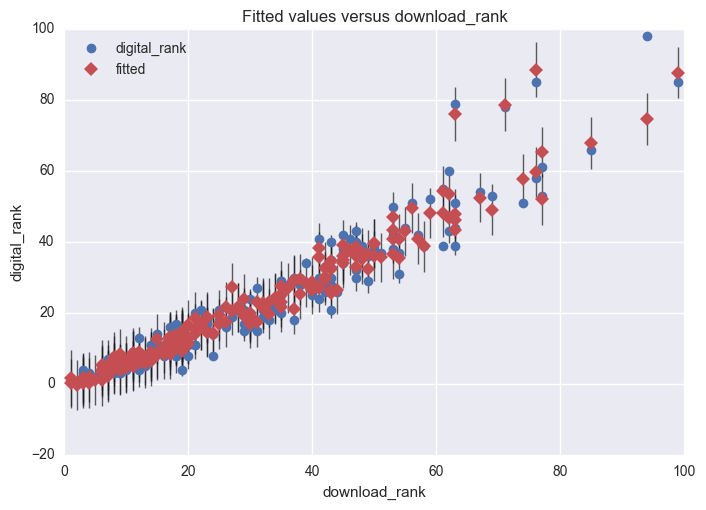

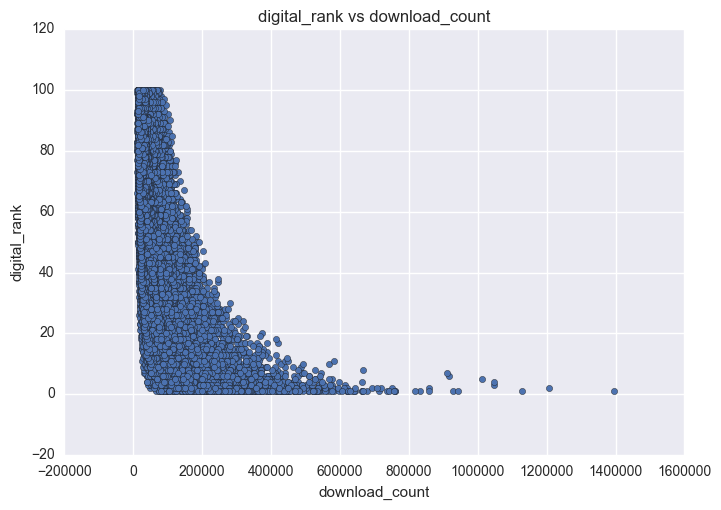

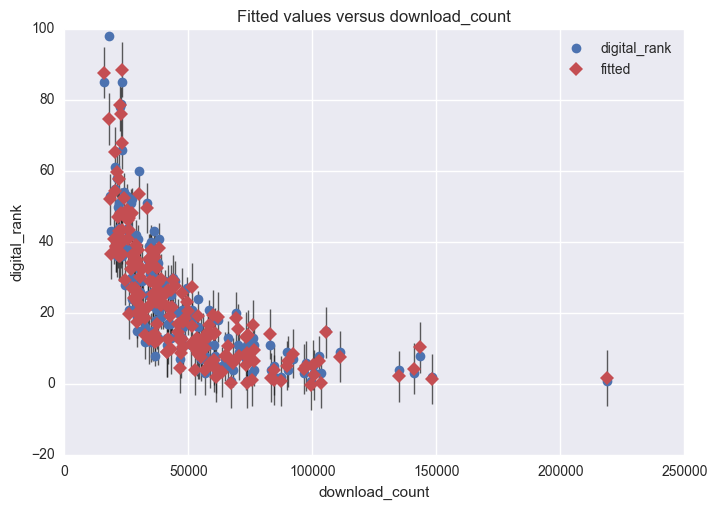

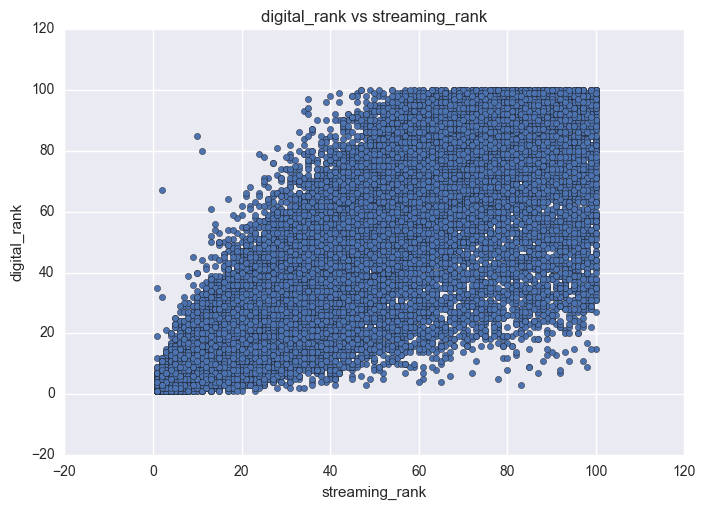

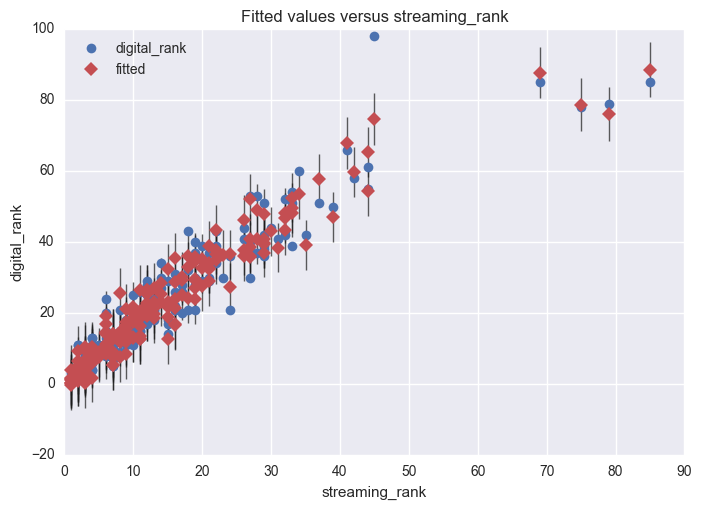

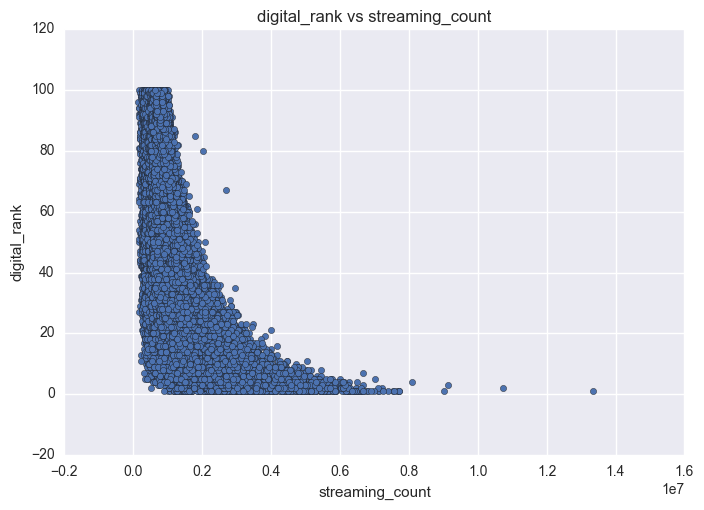

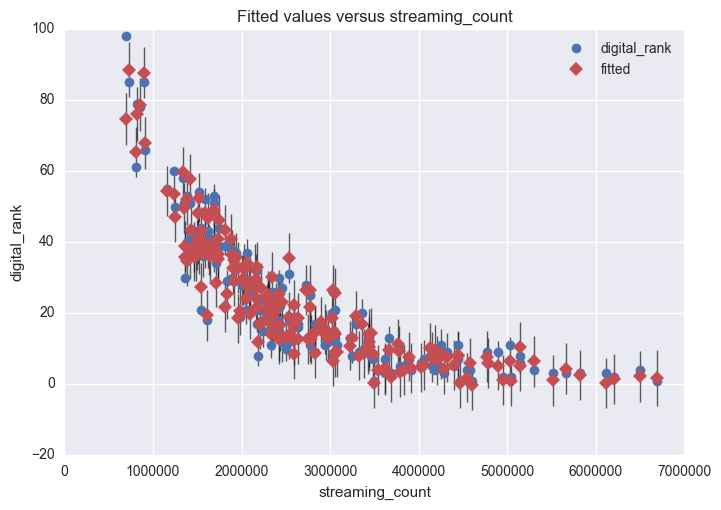

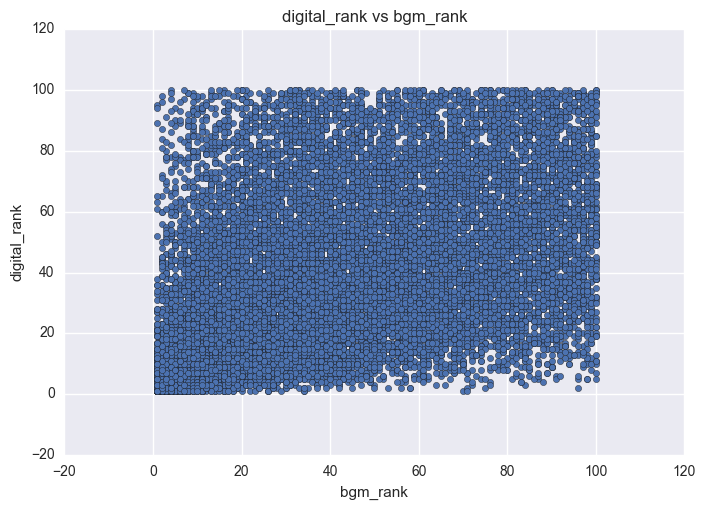

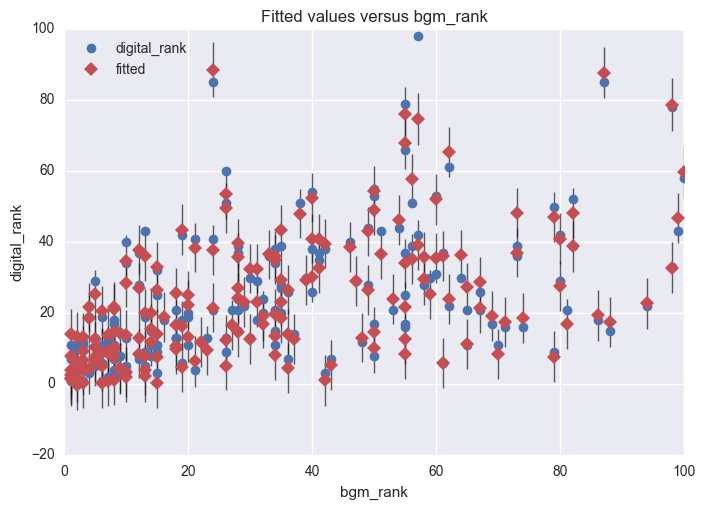

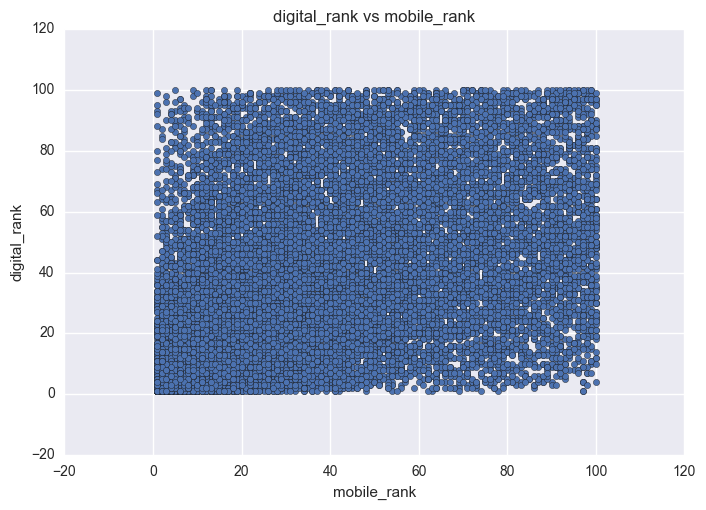

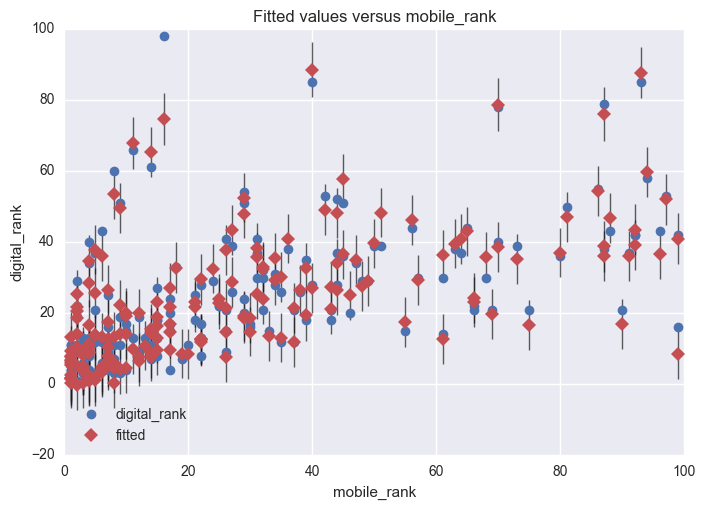

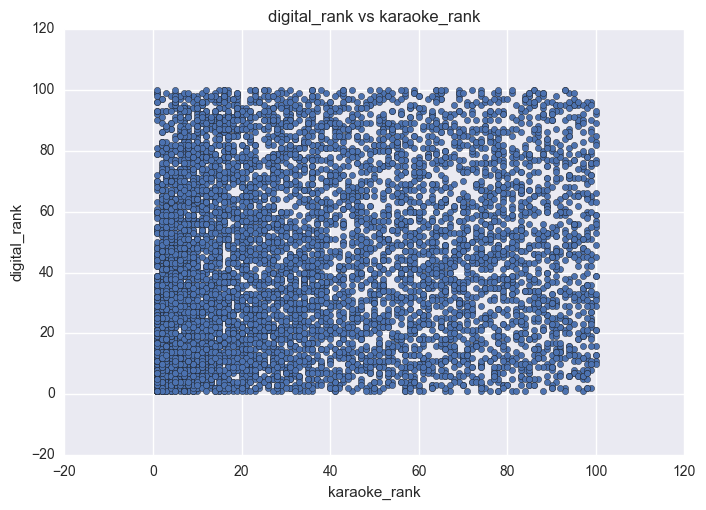

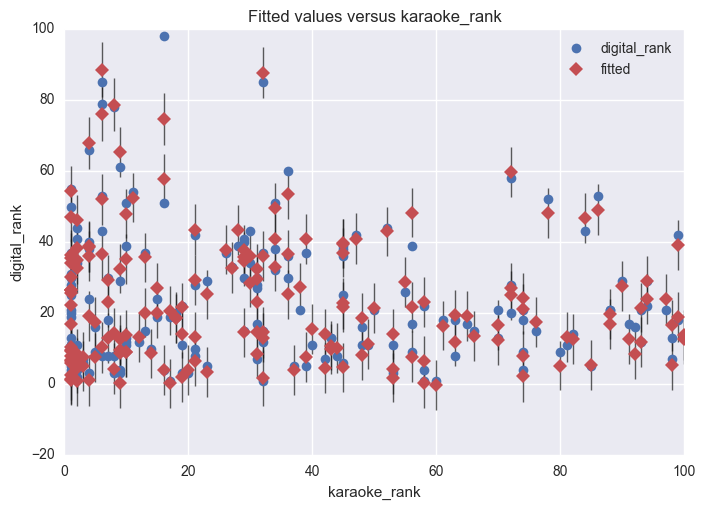

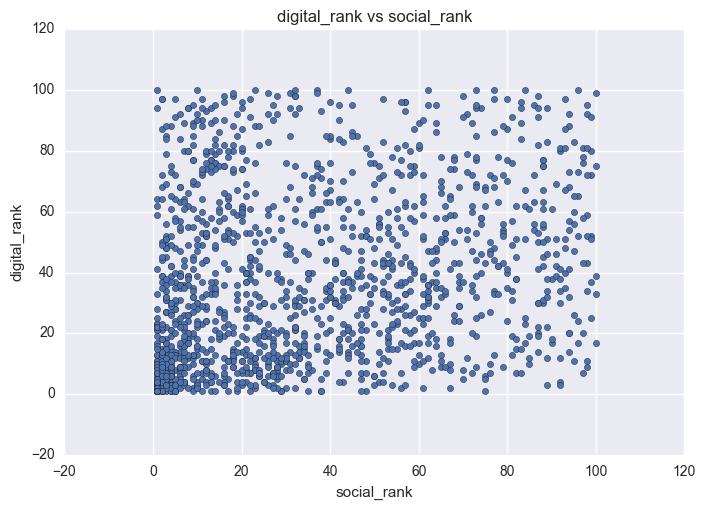

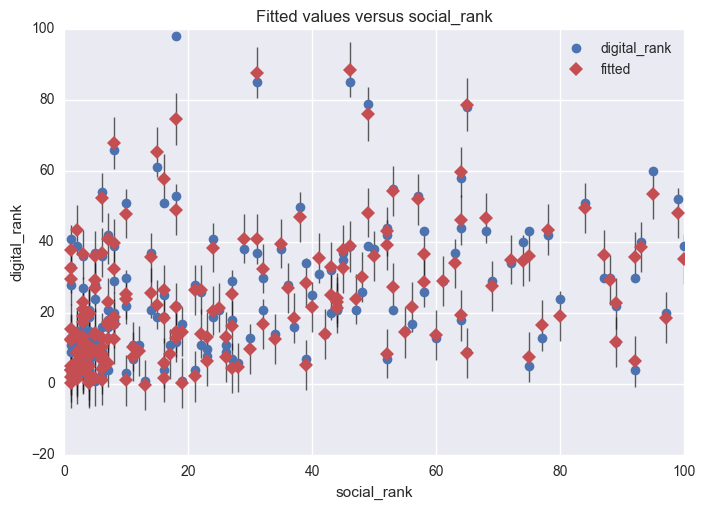

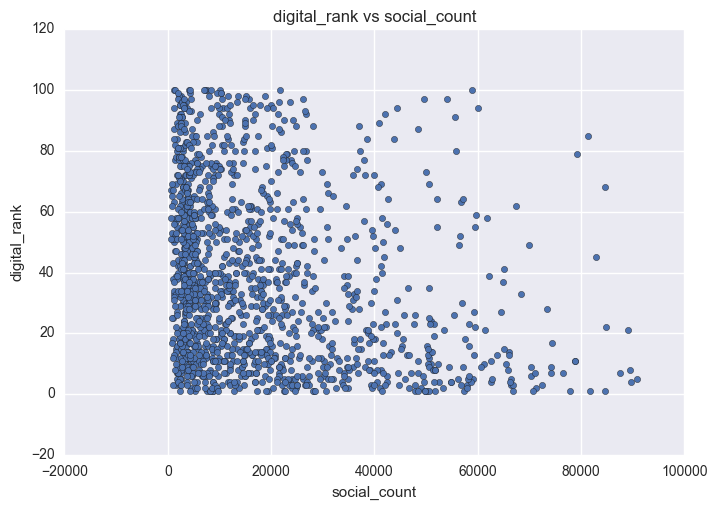

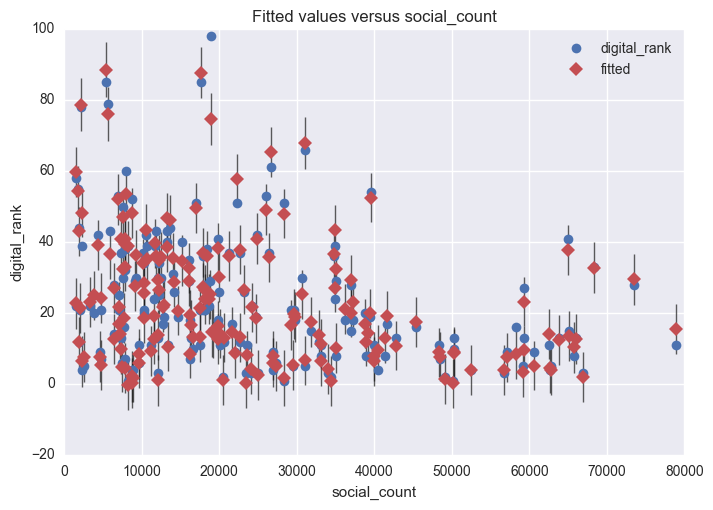

In [46]:
for i in range(0,int(result.df_model)):
    fig, ax = plt.subplots()
    #print(data_x.columns[i])
    row.plot.scatter(y=y_label, x=data_x.columns[i], ax=ax,
                     title=y_label + " vs " + data_x.columns[i])
    fig, ax = plt.subplots()
    sm.graphics.plot_fit(result, i, ax=ax)

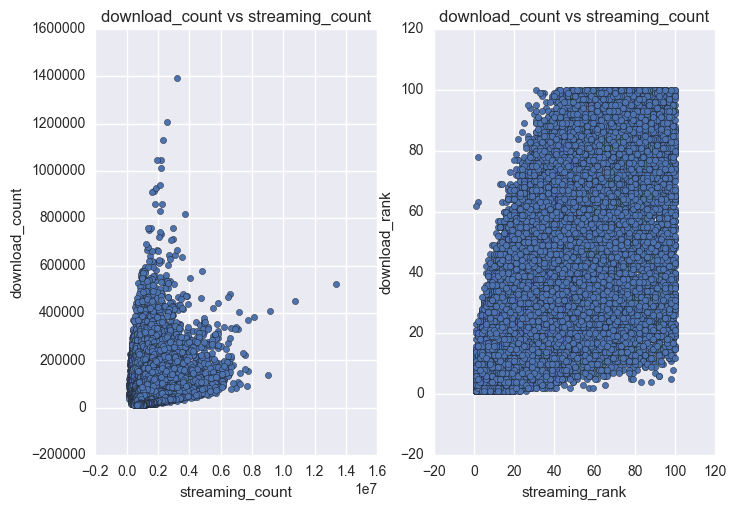

In [47]:
fig, ax = plt.subplots(1,2)
#fig2.set_size_inches(18, 6)
row.plot.scatter(y="download_count", x="streaming_count", ax=ax[0], title="download_count" + " vs " + "streaming_count")
row.plot.scatter(y="download_rank", x="streaming_rank", ax=ax[1], title="download_count" + " vs " + "streaming_count")

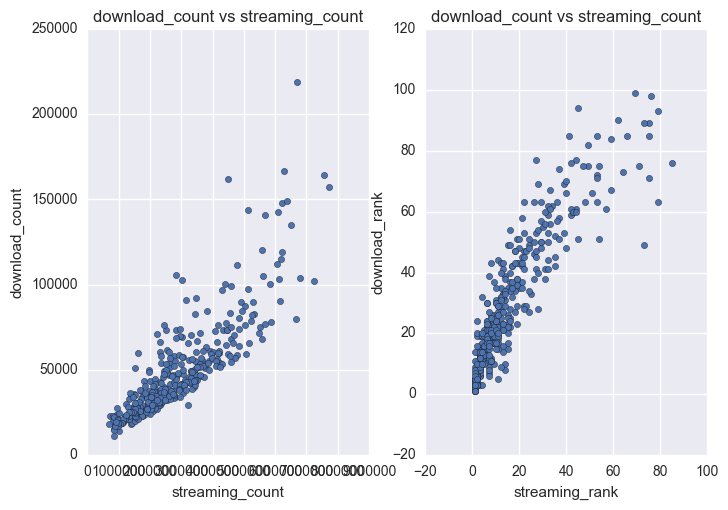

In [48]:
fig, ax = plt.subplots(1,2)
#fig2.set_size_inches(18, 6)
row.dropna().plot.scatter(y="download_count", x="streaming_count", ax=ax[0], title="download_count" + " vs " + "streaming_count")
row.dropna().plot.scatter(y="download_rank", x="streaming_rank", ax=ax[1], title="download_count" + " vs " + "streaming_count")

In [49]:
groupby_title_artist = row.groupby(by=["title", "artist"])

In [50]:
for group in groupby_title_artist.groups:
    title_artist_group = groupby_title_artist.get_group(("위잉위잉", "혁오 (hyukoh)"))
    #print(title_artist_group.sort_values(by=["year","week"]))
    break
groupby_title_artist.get_group(("위잉위잉", "혁오 (hyukoh)")).sort_values(by=["year","week"])

,year,week,title,artist,digital_rank,download_rank,download_count,streaming_rank,streaming_count,bgm_rank,mobile_rank,karaoke_rank,social_rank,social_count
79436,2015,28,위잉위잉,혁오 (hyukoh),83.0,53.0,24682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78986,2015,29,위잉위잉,혁오 (hyukoh),8.0,5.0,151571.0,11.0,3503492.0,22.0,60.0,NaN,NaN,NaN
78610,2015,30,위잉위잉,혁오 (hyukoh),7.0,5.0,134132.0,7.0,4233210.0,16.0,30.0,77.0,NaN,NaN
78240,2015,31,위잉위잉,혁오 (hyukoh),2.0,3.0,161677.0,3.0,6030805.0,8.0,15.0,11.0,NaN,NaN
77877,2015,32,위잉위잉,혁오 (hyukoh),1.0,2.0,142612.0,1.0,6534933.0,7.0,6.0,1.0,NaN,NaN
77516,2015,33,위잉위잉,혁오 (hyukoh),5.0,6.0,100474.0,1.0,5734069.0,5.0,5.0,1.0,NaN,NaN
77146,2015,34,위잉위잉,혁오 (hyukoh),5.0,9.0,74829.0,3.0,5195213.0,14.0,7.0,1.0,NaN,NaN
76779,2015,35,위잉위잉,혁오 (hyukoh),10.0,28.0,62252.0,5.0,4376180.0,24.0,8.0,1.0,NaN,NaN
76413,2015,36,위잉위잉,혁오 (hyukoh),16.0,18.0,65600.0,12.0,3772818.0,41.0,49.0,1.0,NaN,NaN
76033,2015,37,위잉위잉,혁오 (hyukoh),13.0,15.0,51273.0,10.0,3687931.0,61.0,83.0,1.0,NaN,NaN


In [51]:
row[np.isnan(row["digital_rank"]) & (row["social_rank"]>0)]

,year,week,title,artist,digital_rank,download_rank,download_count,streaming_rank,streaming_count,bgm_rank,mobile_rank,karaoke_rank,social_rank,social_count


In [52]:
row.count()

year               36130
week               36130
title              36130
artist             36130
digital_rank       36130
download_rank      32087
download_count     27671
streaming_rank     29985
streaming_count    25548
bgm_rank           18625
mobile_rank        18911
karaoke_rank        7722
social_rank         1429
social_count        1429
dtype: int64

In [ ]:
row[np.isnan(row["streaming_count"])]